<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods:  8. Optimisation
## Statistics
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Statistics

We define a set of $n$ *real numbers* as observations $o_i$:
$$
o_i = (o_1,o_2,\dots,o_n)^T, \quad i=1,n
$$

If we want to describe the *likelihood* that a certain number is taken out of the entire set, and
we assume that the chance to draw a certain number is equal for all numbers, we can define the
probability as
$$
p_i = {{1} \over{n}}, \quad i=1,n.
$$

We then define the *arithmetic mean* of the distribution as:
$$
\bar{o} = \sum\limits_{i} o_i p_i = {{1} \over{n}} \sum\limits_{i} o_i
$$

The *variance* of the distribution is:
$$
var(o) = \sigma^2 = {{1} \over{n}} \sum\limits_{i}  (o_i - \bar{o})^2
$$

Finally, the *standard deviation* is defined as:
$$
\sigma_o = \sqrt{var(o)}
$$

*Skewness* and *kurtosis*, ...

Let's play a bit with `python`: We define an array of eleven integer numbers, then
check the type of the array and the type of a number:

In [2]:
# define an array of numbers
x = np.array([1,2,3,4,5,6,7,8,9,10,11])

We then calculate mean and standard deviation by ourselves...

In [3]:
# MEAN our way
mean1 = 0
for i in range(len(x)):
    mean1 = mean1 + x[i]
mean1 = mean1 / len(x)
print ('mean1:  ',mean1)

# STANDARD DEVIATION our way
sigma1 = 0
for i in range(len(x)):
    sigma1 = sigma1 + (x[i]-mean1)**2
sigma1 = sigma1 / (len(x))
if (sigma1 != 0):
    sigma1 = np.sqrt(sigma1)
print ('sigma1: ',sigma1)

mean1:   6.0
sigma1:  3.1622776601683795


... and the `python` way:

In [4]:
# MEAN python way
mean2 = x.mean()
print ('mean2:  ',mean2)

# STANDARD DEVIATION python way
sigma2 = x.std()
print ('sigma2: ',sigma2)

mean2:   6.0
sigma2:  3.1622776601683795


## Random numbers

Now we can move on to look at `random numbers`.
We first draw a single random number from a uniform distrubution.

In [5]:
x1 = np.random.random(1)
print(x1)

[0.10400743]


The random number is taken from the interval $[0,1[$, with $1$ excluded.

Repeat the cell, and you will see that the random number is always different!

What if we want to always draw the same sequence of 6 numbers? Here we go with calling `seed`
each time before the call to random, always with a fixed number:

In [6]:
np.random.seed(12)
x1 = np.random.random(6)
print(x1)
np.random.seed(12)
x1 = np.random.random(6)
print(x1)
np.random.seed(13)
x1 = np.random.random(6)
print(x1)

[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701]
[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701]
[0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925]


Now we want to dice. We want to draw an *integer number* out of the sequence (1,2,3,4,5,6). 
There is a way to draw integer random numbers, but we want to code it by ourselves.

We throw the dice $n=20$ times by drwaing uniform random numbers, 
which are between 0 and 1 (floats). We multiply them by 6,
then they are in the interval $[0,6[$, with 6 excluded. Add 1 on top, then convert 
to integer numbers:

[4 5 4 5 1 2 1 6 3 5 2 3 1 3 6 2 2 6 1 1]


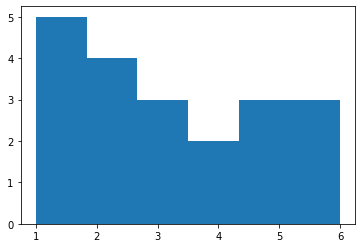

In [7]:
n = 20
x1 = (1+6*np.random.random(n)).astype(int)
print(x1)
x,y,z=plt.hist(x1,bins=6)

Play with the number $n$, the larger it gets, the more **uniform** the distribution is!

Check the `numpy documentation` (in the net) to learn more about the `hist` command from `matplotlib`.

## The temperature example

Now we continue with different random number distribuations, namely the **uniform** and the **normal**
distribution. We first create the two different distributions and plot them. We discuss the latter 
one in more detail later.

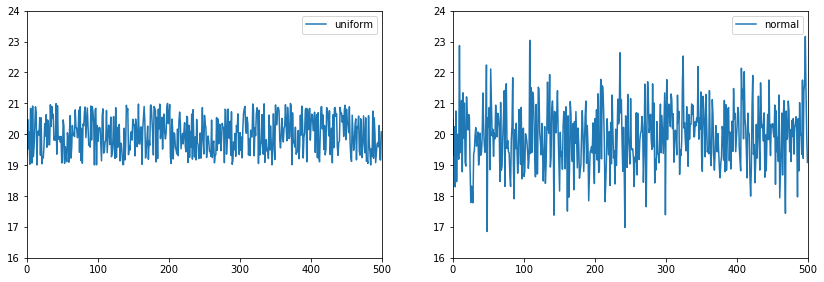

In [8]:
# set numbers drawn
n = 500
# define a mean and a standard deviation
mu    = 20.
sigma = 1.
# call uniform random numbers
np.random.seed(12)
x1 = np.random.uniform(mu-sigma,mu+sigma,n)
# call normal random numbers
np.random.seed(12)
x2 = np.random.normal(mu,sigma,n)
#print (x2)
# plot them side by side
fig=plt.figure(figsize=(14.0,10.0))

plot1=plt.subplot2grid((2,2), (0,0), colspan=1)
plot1.set_xlim([0,n])
plot1.set_ylim([16,24])
plot1.plot(x1,label='uniform')
plot1.legend()

plot2=plt.subplot2grid((2,2), (0,1), colspan=1,rowspan=1)
plot2.set_xlim([0,n])
plot2.set_ylim([16,24])
plot2.plot(x2,label='normal')

plot2.legend()

The histogram for the **uniform** distribution is flat, indicating that all numbers within our range
are statistically equally distributed.

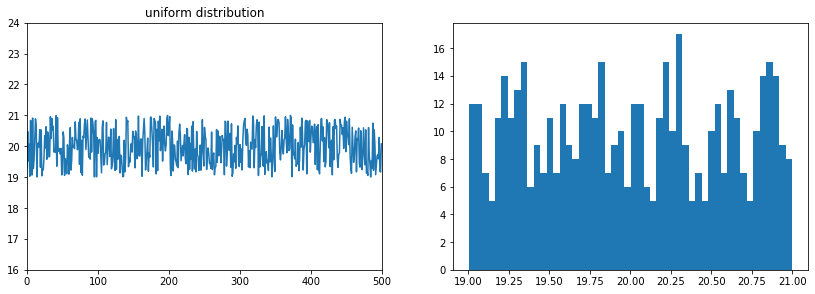

In [9]:
fig=plt.figure(figsize=(14.0,10.0))
plot1=plt.subplot2grid((2,2), (0,0), colspan=1)
plot2=plt.subplot2grid((2,2), (0,1), colspan=1,rowspan=1)
plot1.set_title('uniform distribution')
plot1.set_xlim([0,n])
plot1.set_ylim([16,24])
plot1.plot(x1)
x,y,z=plot2.hist(x1,bins=50)

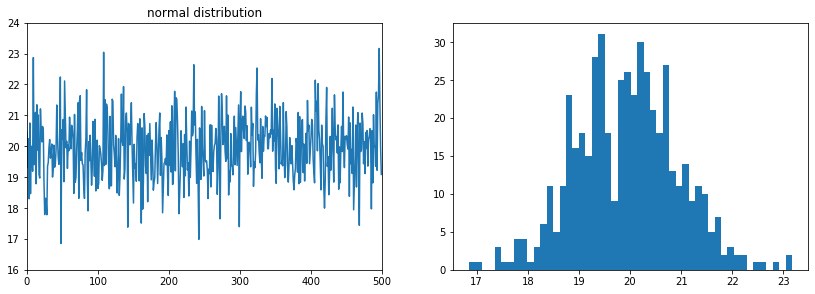

In [10]:
fig=plt.figure(figsize=(14.0,10.0))
plot1=plt.subplot2grid((2,2), (0,0), colspan=1)
plot2=plt.subplot2grid((2,2), (0,1), colspan=1,rowspan=1)
plot1.set_title('normal distribution')
plot1.set_xlim([0,n])
plot1.set_ylim([16,24])
plot1.plot(x2)
x,y,z=plot2.hist(x2,bins=50)

In the case of the **normal** distribution, the histogram follows an inverse exponential function.

This is the classical **Gaussian** curve, given as probability:
$$
p_i = {{1} \over {\sqrt{2\pi \sigma^2}}} e^{-{{(x_i-\mu)^2} \over {2\sigma^2}}}
$$
Plotting this probalility function on top of the histogram for the **normal** distribution proves
that the **normal** distribution follows a Gaussian curve.

Note that the need the keyword `density=True` in the `hist` command to create a normalised
probability density function.

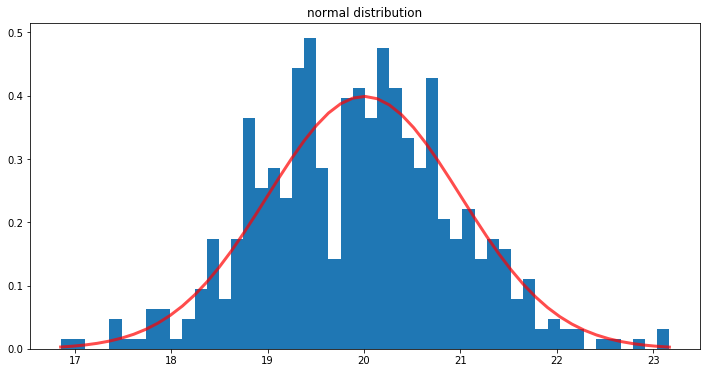

In [11]:
plt.figure(figsize=(12.0,6.0))
plt.title('normal distribution')
count, bins, ignored = plt.hist(x2,bins=50,density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2*np.pi)) * np.exp( -(bins-mu)**2 / (2*sigma**2) ),lw=3, alpha=0.7,c='r')

In the plot above, we find our standard deviation $\sigma$ as half-width. 

- Around 68.27 % of all points are within the $1 \sigma$ uncertainty.
- Around 95.45 % of all points are within the $2 \sigma$ uncertainty.
- Around 99.73 % of all points are within the $3 \sigma$ uncertainty.

We can figure this numbers out by integrating the above curve ...

----
[next>](Numerics_lab08_chi2.ipynb)